# ต้องลง TA-Lib

In [ ]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3681    0  3681    0     0   7496      0 --:--:-- --:--:-- --:--:--  7496
100  503k  100  503k    0     0   368k      0  0:00:01  0:00:01 --:--:-- 3446k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3693    0  3693    0     0   8080      0 --:--:-- --:--:-- --:--:--  8080
100  406k  100  406k    0     0   315k      0  0:00:01  0:00:01 --:--:--  723k


In [ ]:
!pip install pandas_ta

In [ ]:
!pip install yfinance

In [ ]:
!pip install mplfinance

In [ ]:
!pip install vectorbt

In [ ]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import yfinance as yf
import vectorbt as vbt
import mplfinance as mpf

In [ ]:
data = pd.DataFrame()
data = data.ta.ticker('EURUSD=x', period = '5d', interval ='15m')

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2021-08-17 14:45:00+01:00,1.174260,1.174398,1.173985,1.174122,0,0,0
2021-08-17 15:00:00+01:00,1.174122,1.174122,1.173296,1.173296,0,0,0
2021-08-17 15:15:00+01:00,1.173296,1.173296,1.172883,1.173020,0,0,0
2021-08-17 15:30:00+01:00,1.172883,1.172883,1.171921,1.172196,0,0,0
2021-08-17 15:44:10+01:00,1.172333,1.172333,1.172333,1.172333,0,0,0


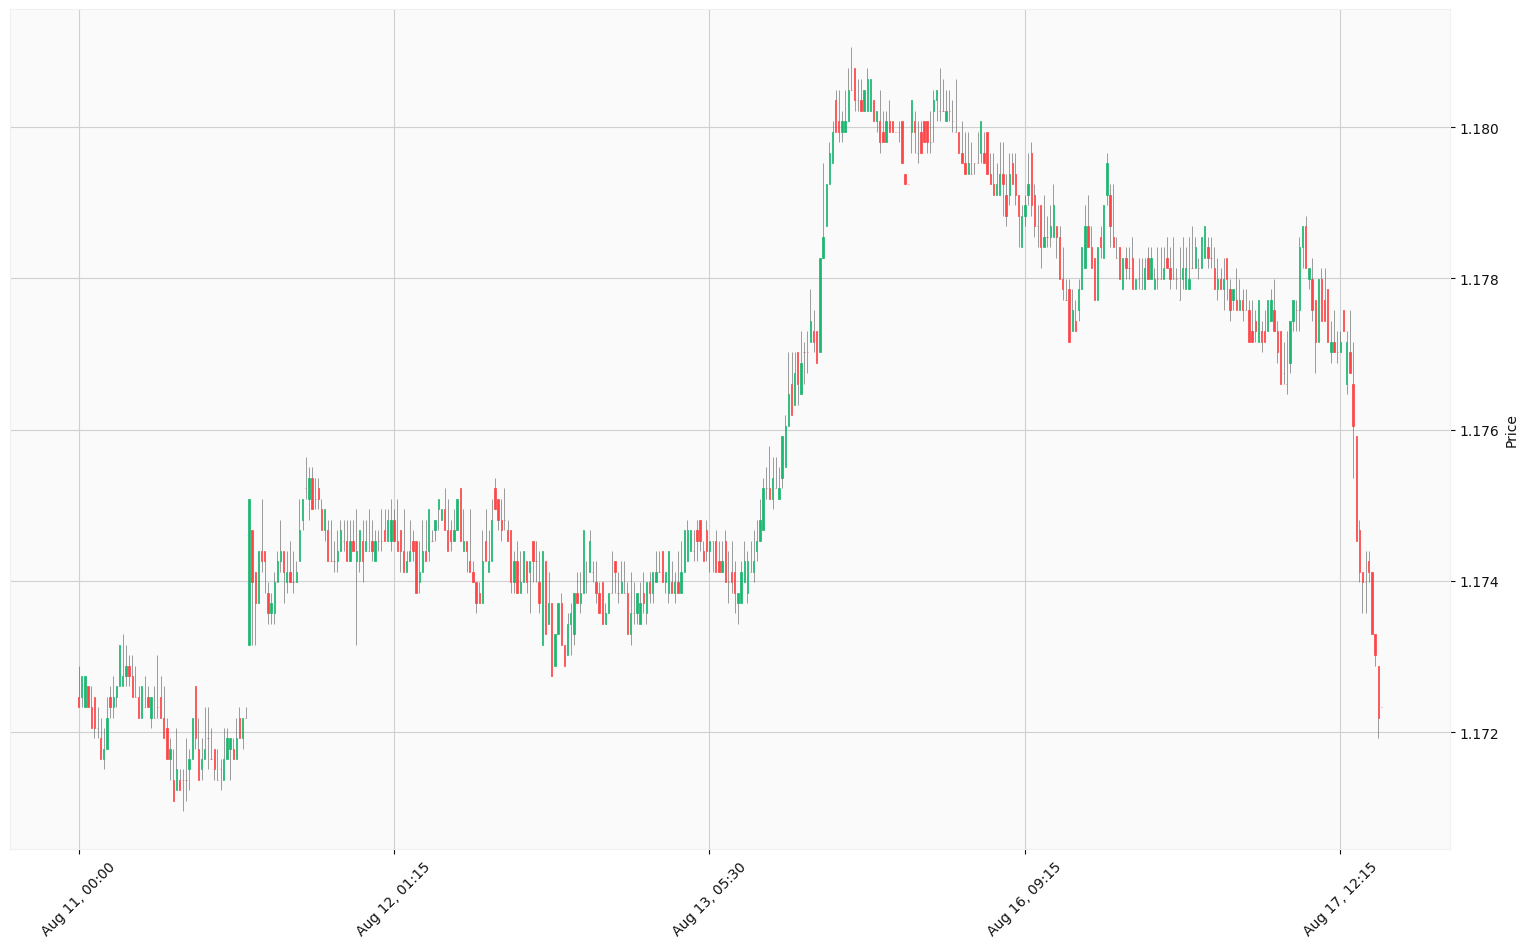

In [ ]:
mpf.plot(data, type='candle',style='yahoo',figsize=(20,12))

In [ ]:
data = pd.DataFrame()
data = data.ta.ticker('aapl', period = '10d', interval ='15m')

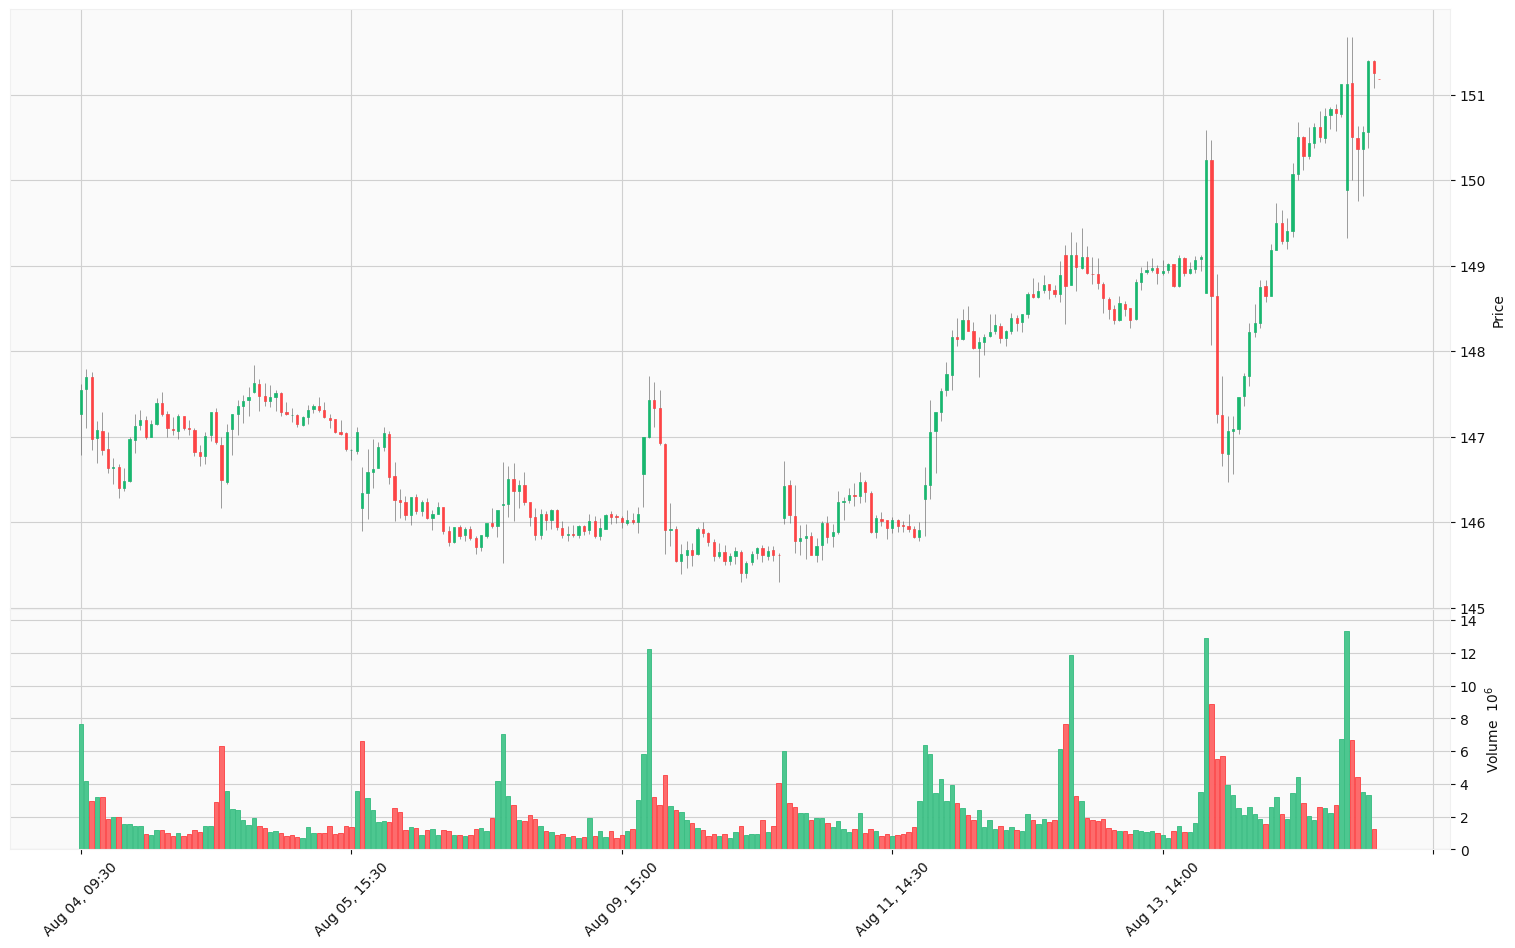

In [ ]:
mpf.plot(data, type='candle',style='yahoo',figsize=(20,12),volume=True)

https://github.com/twopirllc/pandas-ta#candles-64

In [ ]:
data.copy().ta.cdl_pattern(name="all").columns

Index(['CDL_2CROWS', 'CDL_3BLACKCROWS', 'CDL_3INSIDE', 'CDL_3LINESTRIKE',
       'CDL_3OUTSIDE', 'CDL_3STARSINSOUTH', 'CDL_3WHITESOLDIERS',
       'CDL_ABANDONEDBABY', 'CDL_ADVANCEBLOCK', 'CDL_BELTHOLD',
       'CDL_BREAKAWAY', 'CDL_CLOSINGMARUBOZU', 'CDL_CONCEALBABYSWALL',
       'CDL_COUNTERATTACK', 'CDL_DARKCLOUDCOVER', 'CDL_DOJI_10_0.1',
       'CDL_DOJISTAR', 'CDL_DRAGONFLYDOJI', 'CDL_ENGULFING',
       'CDL_EVENINGDOJISTAR', 'CDL_EVENINGSTAR', 'CDL_GAPSIDESIDEWHITE',
       'CDL_GRAVESTONEDOJI', 'CDL_HAMMER', 'CDL_HANGINGMAN', 'CDL_HARAMI',
       'CDL_HARAMICROSS', 'CDL_HIGHWAVE', 'CDL_HIKKAKE', 'CDL_HIKKAKEMOD',
       'CDL_HOMINGPIGEON', 'CDL_IDENTICAL3CROWS', 'CDL_INNECK', 'CDL_INSIDE',
       'CDL_INVERTEDHAMMER', 'CDL_KICKING', 'CDL_KICKINGBYLENGTH',
       'CDL_LADDERBOTTOM', 'CDL_LONGLEGGEDDOJI', 'CDL_LONGLINE',
       'CDL_MARUBOZU', 'CDL_MATCHINGLOW', 'CDL_MATHOLD', 'CDL_MORNINGDOJISTAR',
       'CDL_MORNINGSTAR', 'CDL_ONNECK', 'CDL_PIERCING', 'CDL_RICKSHAWMAN',
       

In [ ]:
df = data.copy()
df.ta.cdl_pattern(name='hammer',append=True)
# df.CDL_HAMMER

In [ ]:
df['mark_position'] = df['Low'] * 0.99

In [ ]:
marks = ['^' if x == 100 else '' for x in df['CDL_HAMMER']]
cdl_plot = mpf.make_addplot(df['mark_position'],type='scatter',marker=marks)

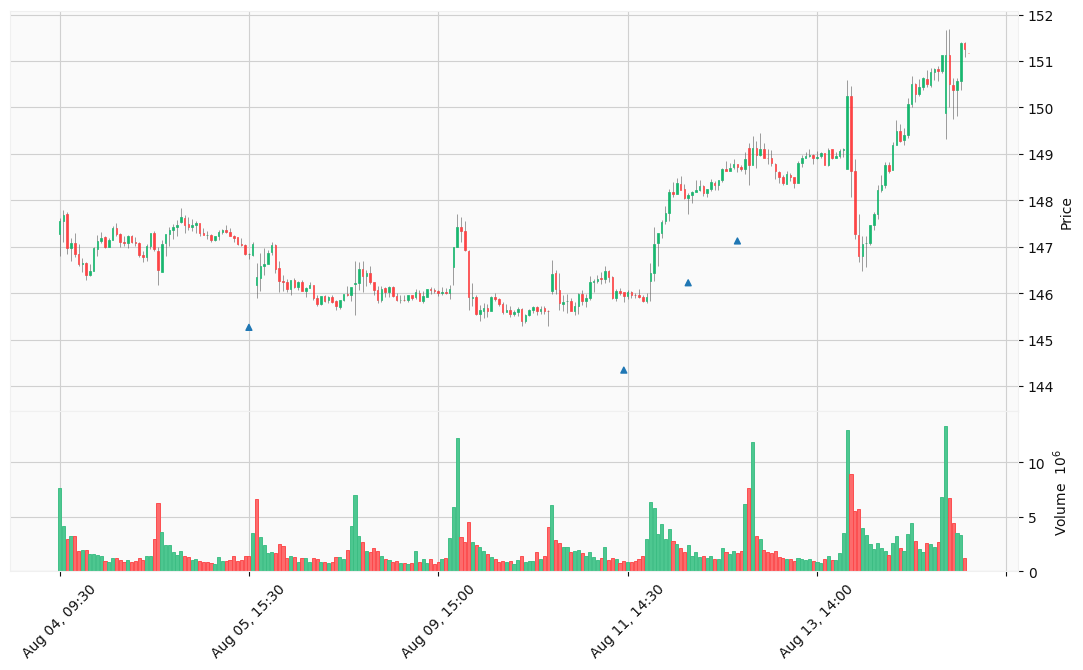

In [ ]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)

In [ ]:
buy_signal = ['morningstar','hammer','3whitesoldiers']
sell_signal = ['eveningstar','shootingstar','3blackcrows']

all_signal = buy_signal+sell_signal

In [ ]:
df = data.copy()
df.ta.cdl_pattern(name=all_signal,append=True)
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'CDL_MORNINGSTAR', 'CDL_HAMMER', 'CDL_3WHITESOLDIERS',
       'CDL_EVENINGSTAR', 'CDL_SHOOTINGSTAR', 'CDL_3BLACKCROWS'],
      dtype='object')

In [ ]:
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-6]!=0)]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,CDL_MORNINGSTAR,CDL_HAMMER,CDL_3WHITESOLDIERS,CDL_EVENINGSTAR,CDL_SHOOTINGSTAR,CDL_3BLACKCROWS
Datetime,,,,,,,,,,,,,
2021-08-04 15:15:00-04:00,146.771606,147.050003,146.685196,147.013000,1430376,0.0,0,100.0,0.0,0.0,0.0,0.0,0.0
2021-08-05 15:30:00-04:00,146.840302,146.860001,146.729996,146.845001,1377706,0.0,0,0.0,100.0,0.0,0.0,0.0,0.0
2021-08-05 15:45:00-04:00,146.830002,147.110001,146.800003,147.059998,3537373,0.0,0,100.0,0.0,0.0,0.0,0.0,0.0
2021-08-11 14:15:00-04:00,146.020004,146.020004,145.800003,145.934998,922079,0.0,0,0.0,100.0,0.0,0.0,0.0,0.0
2021-08-12 12:00:00-04:00,148.039902,148.159897,147.699997,148.110001,2371663,0.0,0,0.0,100.0,0.0,0.0,0.0,0.0
2021-08-12 15:15:00-04:00,148.779907,148.779907,148.610001,148.714996,1646643,0.0,0,0.0,100.0,0.0,0.0,0.0,0.0


In [ ]:
df.loc[(df.iloc[:,-6]!=0 )| (df.iloc[:,-5]!=0) | (df.iloc[:,-4]!=0), 'signal'] = 'buy'
df.loc[(df.iloc[:,-4]!=0 )| (df.iloc[:,-3]!=0) | (df.iloc[:,-2]!=0), 'signal'] = 'sell'

In [ ]:
df.loc[df['signal'] == 'buy', 'mark_price'] = df['Low'] *0.99
df.loc[df['signal'] == 'sell','mark_price']  = df['High'] *1.01


In [ ]:
marks = ['^' if x == 'buy' else 'v' if x == 'sell' else '' for x in df['signal']]
color = ['g' if x == 'buy' else 'r' if x == 'sell' else 'b' for x in df['signal']]
cdl_plot = mpf.make_addplot(df['mark_price'],type='scatter',marker=marks,color=color)

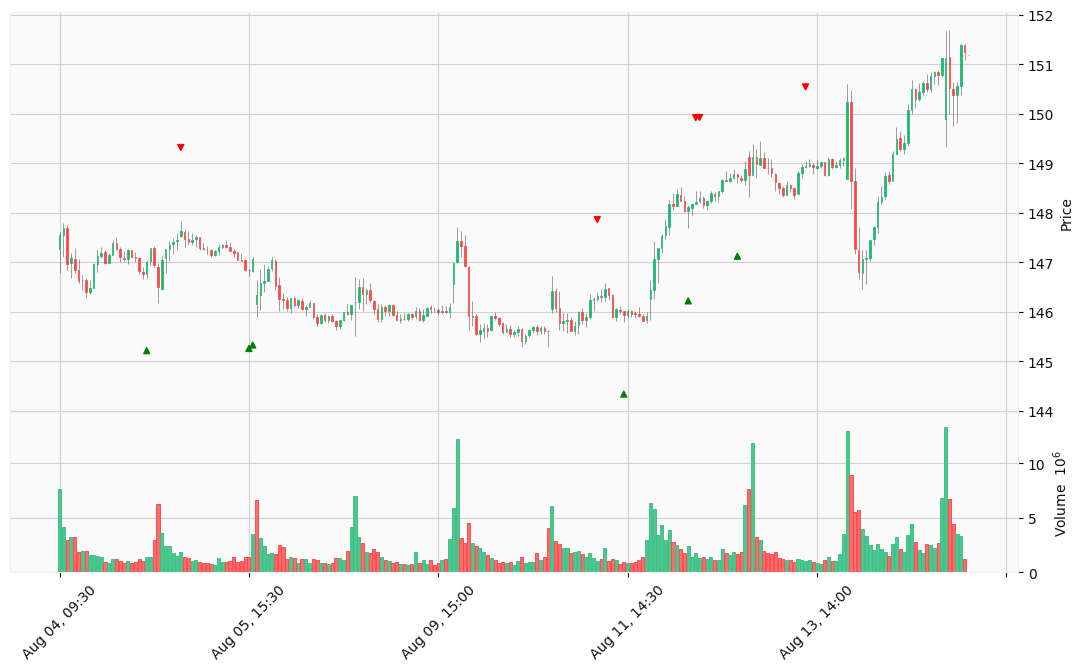

In [ ]:
mpf.plot(data,addplot=cdl_plot ,type='candle',style='yahoo',figsize=(14,8),volume=True)